Today we are gonna learn how some of the math we have learned can be applied to video games. We are going to calculate and animate the trajectory of a soccer ball that has been kicked (think Fifa).  This might seem like a difficult and tedious task, but really we only need a little bit of physics and coding ability to accomplish this task.  As we go, we will build up our equations to account for different conditions (like spin and wind speed), but first, we need to talk about parametric vector equations.

We know that vectors have a direction and magnitude and that we may place them anywhere in a coordinate system without changing the vector (eg. we can put the vector $ \left[ {\begin{array}{cc}
   1  \\
   1  \\
  \end{array} } \right]$ with its tail at the origin or at the point $(5,0)$, and it will be the same vector.

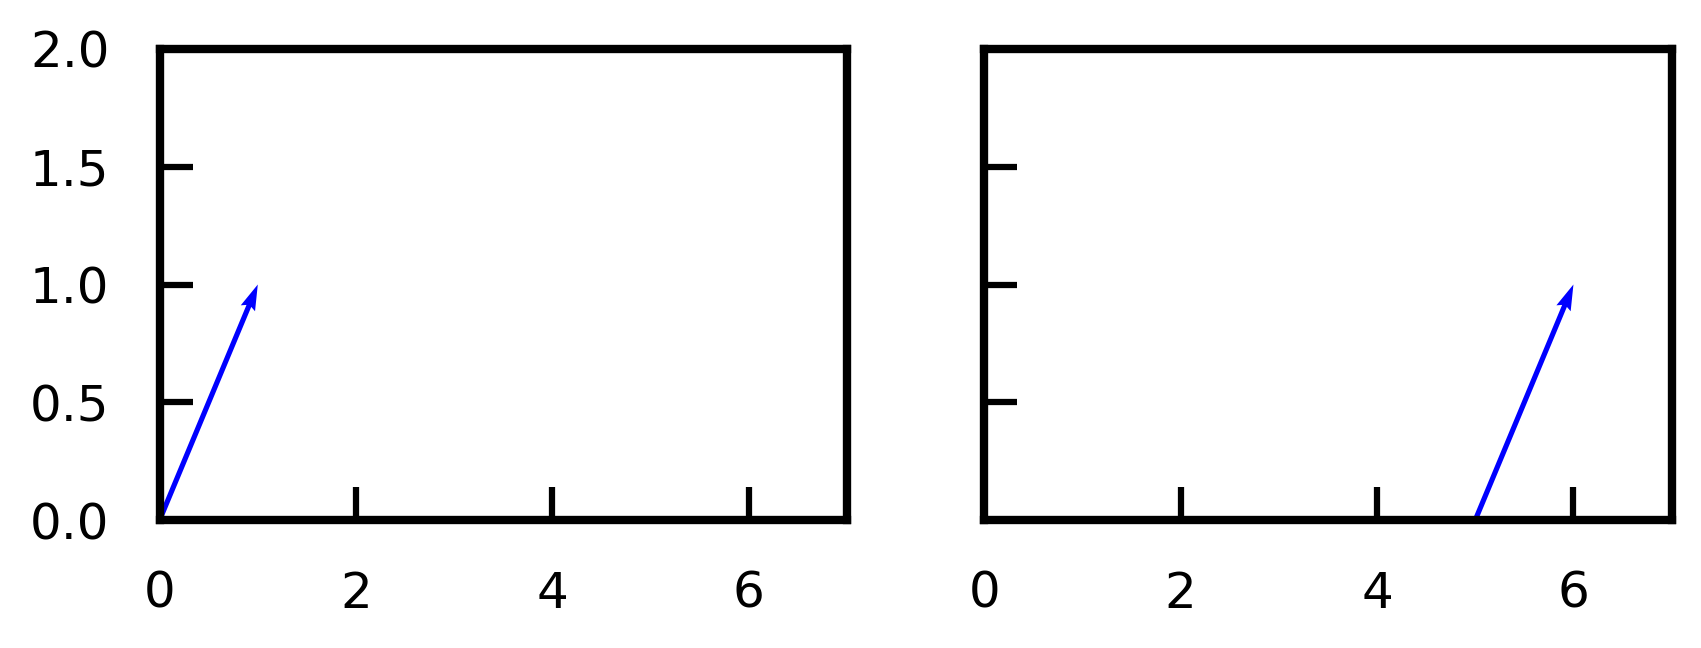

In [33]:
import matplotlib.pyplot as plt
import numpy as np 


# create vector as numpy array
a = np.array([1,1])

# create figure with vector plotted at (0,0) and (5,0)
f, ((ax1,ax2)) = plt.subplots(1,2, sharex = True, sharey=True)
f.set_size_inches((7,2))

#set x and y axis limits for subplots
plt.xlim((0,7))
plt.ylim((0,2))

#plot the vector at (0,0) and (5,0)
ax1.quiver([0],[0], a[0],a[1], color = 'b', angles='xy', scale_units='xy', scale=1)
ax2.quiver([5],[0], a[0],a[1], color = 'b', angles='xy', scale_units='xy', scale=1)
plt.show()




For trajectories of objects it is customary to choose the tail of a vector to remain fixed and for the head of the arrow to point to the location of the object in our coordinate system for a given point in time.  Therefore, we can define a time dependent vector $ \left[ {\begin{array}{cc}
   x(t)  \\
   y(t)  \\
  \end{array} } \right]$ which tracks the $x$ position, $x(t)$, and $y$ position, $y(t)$, of our object in time and has its tail at the origin.  As an example, we show how this vector changes in time and points to an object that is moving in a sinusoidal trajectory.  The trajectory is given below, and we can track the position of the object along the trajectory using the sliding bar for time.

In [16]:
from ipywidgets import interact

# define a function that tracks the y position as a function of time
def y(t):
    return np.sin(t)

# define a function that tracks the x position as a function of time 
def x(t):
    return t

# define the time range and the number of points
t = np.linspace(0,10, num=100)
print "t equals", t

# plot the sine function and the vector that points to the x and y value at a given time
def plot(time):
    plt.plot(t,y(t))
    plt.quiver([x(time)],[y(time)], color='b',angles='xy', scale_units='xy', scale=1)
    plt.show()

interact(plot, time=(0,10, 0.05))

t equals [  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
  

<function __main__.plot>

In [29]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import HTML

# define a function that tracks the y position as a function of time
def y(t):
    return np.sin(t)

# define a function that tracks the x position as a function of time 
def x(t):
    return t
        
fig, ax = plt.subplots(1,1)
global Q
Q= ax.quiver([0],[0],color='b',angles='xy', scale_units='xy', scale=1)
ax.set_xlim(-1, 11)
ax.set_ylim(-1.25,1.25)
t = np.linspace(0,10, 1000)
ax.plot(t, y(t))

def init():
    # define a function that tracks the y position as a function of time
    Q.set_UVC([0],[0])
#    fig.plotTrajectory()
    return Q,

def animate(i):

    Q.set_UVC([x(i/10.0)],[y(i/10.0)])
    #ax.quiver([x(i/10.0)],[y(i/10.0)],color='b',angles='xy', scale_units='xy', scale=1)
    return Q,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
#rc('animation', html='html5')
#anim
HTML(anim.to_html5_video())
#anim.save('animtest')
#HTML(anim.to_html5_video())




-

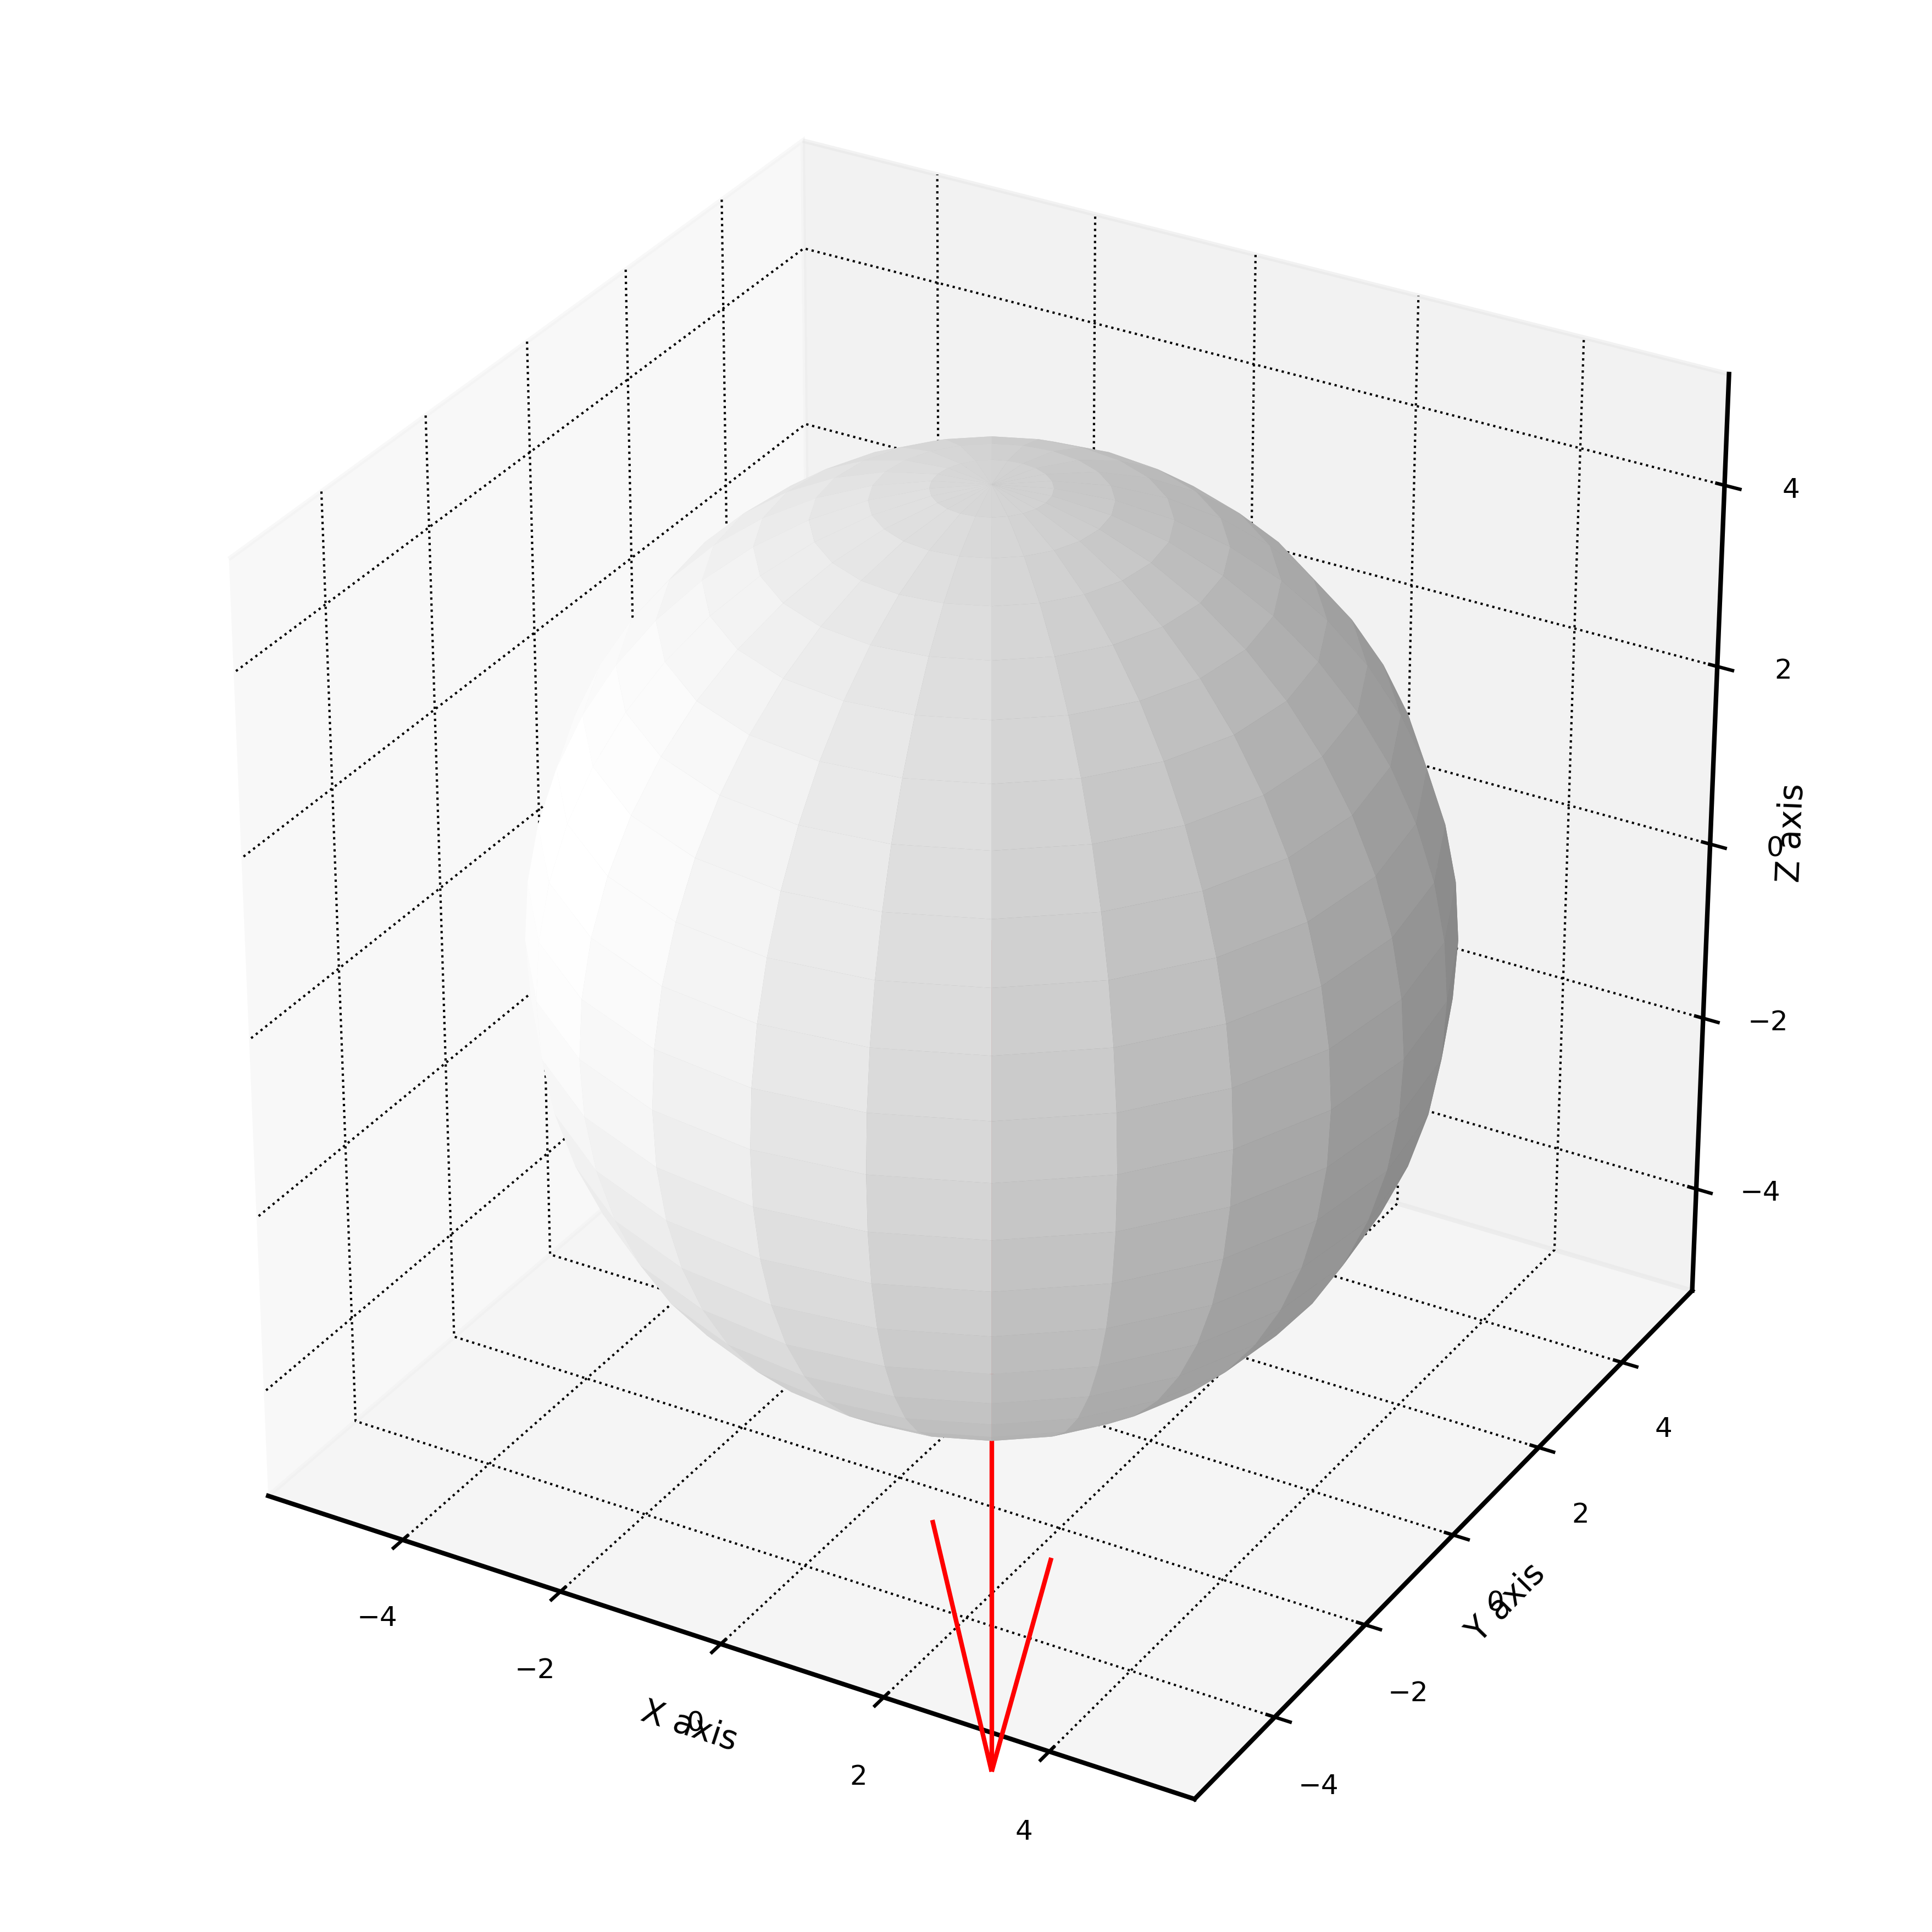

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 


fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, aspect= 'equal',projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = 5 * np.outer(np.cos(u), np.sin(v))
y = 5 * np.outer(np.sin(u), np.sin(v))
z = 5 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='w')
ax.quiver([0],[0],[0],[0],[0],[-9.81],color='r')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


No matter the position of the ball in space gravity is always acting downwards as the vector ${\bf{f}}_{gravity}=m \left[ {\begin{array}{cc}
   0  \\
   0  \\
   -9.81 \frac{m}{s^2}  \\
  \end{array} } \right]$.  
  If we were working in one dimension we can write the differential equation (more on these later in the semester)
  
  $m a(t)=f_{gravity}$
  
  $m \frac{d^2z}{t^2} = mg = m(-9.81m/s^2)$,
  
  and we can integrate twice to get the kinematics equation from physics.
  
  $z(t) = \frac{1}{2}gt^2+v(0)t +z(0)$.
  
  As we discussed above, our forces and acceleration are now vectors living in three dimensions.  Can you write down the differential equations we need to integrate?
  
For the same reason that derivatives of vectors act component wise, integration for vectors is also component wise.  So we may write down the final equation for the prejectile motion of our ball.  

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from IPython.display import HTML
# initial velocity vector in m/s
initVel = np.array([0,26, 7])

# initial position in m
initPos = np.array([0,0,0])

print "Intitial Speed is " + str(np.linalg.norm(initVel))

# units of m/s^2
gravityVec = np.array([0,0,-9.81])

# position of ball as vector in time
def vecX(t):
    return 0.5*gravityVec *t**2+ initVel*t + initPos

#initial points on ball's surface
# Make data
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = 2 * np.outer(np.cos(u), np.sin(v)) + initPos[0]
y = 0.11 * np.outer(np.sin(u), np.sin(v)) + initPos[1]
z = 0.11 * np.outer(np.ones(np.size(u)), np.cos(v)) + initPos[2]

def plotBall(t,x,y,z, Q):
    center = vecX(t)
    x = x+center[0]
    y = y+center[1]
    z = z+center[2]
    Q= ax.plot_surface(x, y, z, color='w')
    return Q,

fig = plt.figure()
ax = fig.add_subplot(111, aspect= 'equal',projection='3d')   
ax.set_xlim(-5, 5)
ax.set_ylim(-1,20)
ax.set_zlim(-5, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

global Q
Q= ax.plot_surface(x, y, z, color='w')

    
anim = animation.FuncAnimation(fig, plotBall, fargs = (x,y,z,Q), frames=100, interval=10, blit=True)
#rc('animation', html='html5')
#anim
HTML(anim.to_html5_video())
anim

Intitial Speed is 26.9258240357
